### Cortical Layers Spanning the Y-direction

In [4]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2
import scipy.stats as stats

import csv

data = open('../data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

vol = np.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    vol[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = r[-1]


#### Heat Maps
Cortical layers defined by the y-bounds: [(1564,1837), (1837,2071), (2071,2305), (2305,2539), (2539,3124)]
Synapse desnity was averaged across the y-s in each of these bounds, leaving an x-z plane of syn-density average in the each cortical layer.

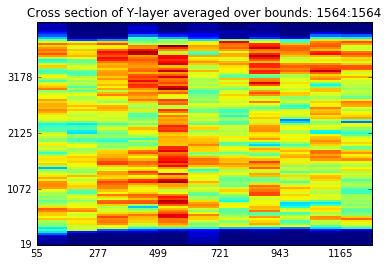

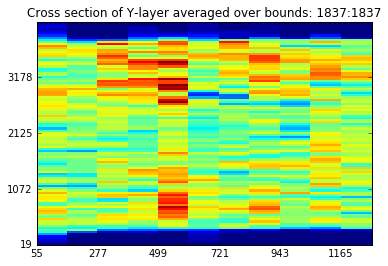

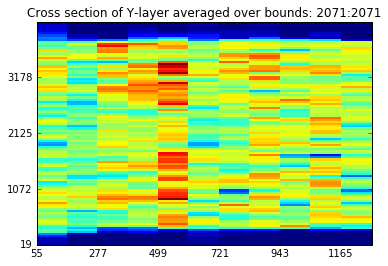

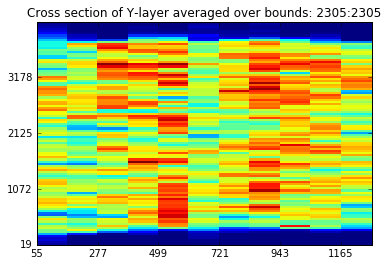

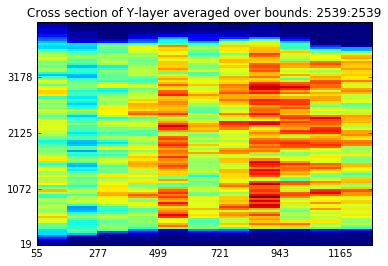

In [3]:
#heat maps/hex plots of y-layers, how is density distributed across them?
y_bounds = [(1564,1837), (1837,2071), (2071,2305), (2305,2539), (2539,3124)]
y_idcs = []
for i, bounds in enumerate(y_bounds):
    y_lower = sorted_y.index(bounds[0])
    y_upper = sorted_y.index(bounds[1])
    y_idcs.append((y_lower,y_upper))

for i, bounds in enumerate(y_idcs):
    temp = vol[:,bounds[0]:bounds[1],:]
    avg_y_temp = np.mean(temp,1)
    plt.figure()
    plt.xlim((0,len(sorted_z)))
    plt.ylim((0,len(sorted_x)))
    heatmap = plt.pcolor(avg_y_temp)
    plt.title('Cross section of Y-layer averaged over bounds: ' + str(y_bounds[i][0]) + ':' + str(y_bounds[i][0]))
    plt.xticks(range(0,len(sorted_z),int(np.floor(len(sorted_z)/4))),[ item for i,item in enumerate(sorted_z) if i%np.floor(len(sorted_z)/4)==0 ])
    plt.yticks(range(0,len(sorted_x),int(np.floor(len(sorted_x)/4))),[ item for i,item in enumerate(sorted_x) if i%np.floor(len(sorted_x)/4)==0 ])
    plt.show()
